# Starting info

- Our brand is Grotal

In [2]:
import importlib

import pandas as pd
import seaborn as sns
import daft as d
import matplotlib.pyplot as plt
import utils as ut

In [3]:
importlib.reload(ut)

<module 'utils' from '/Users/zakhar/Desktop/code/xttr-test-brands/utils.py'>

# Reading the file

In [4]:
df = pd.read_csv("test_brand_data.csv")
df2 = d.from_pandas(df)

# Datatype conversion

In [6]:
# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])
# Have a look at the data
print(df.head())

        date    brand  region  total_sales  total_items_count  \
0 2027-02-06  Словора  Москва   2679000.97              23299   
1 2027-01-02   Зефора  Москва   2567184.96              19403   
2 2027-02-27  Словора  Москва   2869078.09              22382   
3 2027-01-02   Каморн  Москва   2899584.85              26983   
4 2027-01-02  Словора  Москва   4758714.46              51520   

   total_receipts_count  total_stores_count  
0                 20085                 927  
1                 16886                 855  
2                 19289                 932  
3                 23316                 932  
4                 42814                 927  


# Potential metrics

the WHATs:
+ sales by brand/region -> who's selling more?
+ competitors -> who are our rivals?

now the WHYs:
- top gainer/loser regions for us
- unit economics in gainer/loser regions

- average items per receipt by brand/region
- average receipt value by brand/region -> are people spending more? are the prices rising?
- stores by brand over time -> opening or closing, expanding or shrinking?

# TODO

- Why are Hantir and Fridmos top in growth?
- Can we increase sales in top regions?
- What about top 3-5 regions that comprise 15% of sales?

In [28]:
# Additional metrics

# Items per receipt
df["items_per_receipt"] = df["total_items_count"] / df["total_receipts_count"]
# Avg receipt value
df["avg_receipt_value"] = df["total_sales"] / df["total_receipts_count"]
# Avg sales per store
df["sales_per_store"] = df["total_sales"] / df["total_stores_count"]
# Average item price
df["avg_item_price"] = df["total_sales"] / df["total_items_count"]

# Last 6 months of data

To help us analyse the latest trends

In [39]:
df_hy = ut.slice_last_mo(df, 6)

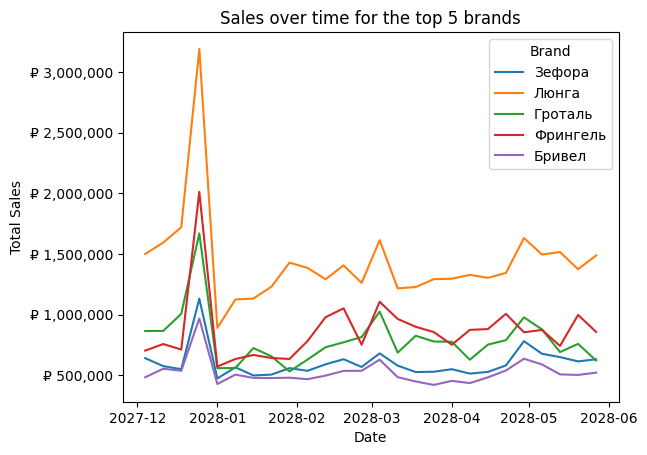

In [ ]:
# Let's take top 5 brands by cumulative sales
top_5 = ut.get_top_brands(df_hy, 5)

# Draw line chart of sales over time for the top 5 brands

# Top 5 brands' indices
top_5 = top_5.index
df_top_brands = df_hy[df_hy["brand"].isin(top_5)]

# Chart without confidence intervals
top_brand_plot = sns.lineplot(
    data=df_top_brands, x="date", y="total_sales", hue="brand", errorbar=None
)
# Format the x-axis
# top_brand_plot.set_xlim(three_months_ago, last_date)
# Format the labels
top_brand_plot.set(
    xlabel="Date", ylabel="Total Sales", title="Sales over time for the top 5 brands"
)
# Add a legend with a title
top_brand_plot.legend(title="Brand")
# Format the numbers as currency
top_brand_plot.yaxis.set_major_formatter("₽ {x:,.0f}")
# Rotate the x-axis labels
# top_brand_plot.set_xticklabels(top_brand_plot.get_xticklabels(), rotation=90)

We've ironed out the main rivals as:
- Зефора
- Люнга
- Гроталь
- Бривел
- Фрингель

P.S. We had a sharp drop in sales over the last several weeks, and our competitors (Fringel and Lunga) had sales rise.

Let's now dissect the sales for Grotal and Fringel and Lunga:
- by region
- by price

In [9]:
# Getting top 5 regions for the brand "Гроталь"
grotal = ut.get_top_regions(df_hy, 5, "brand", "region", "total_sales", "Гроталь")

# Get the regions indices
grotal_regions = grotal.index.get_level_values(1)

# Get sales for Fringel in these regions
fringel = ut.get_top_regions(df_hy, 5, "brand", "region", "total_sales", "Фрингель")
fringel_in_regions = (
    df_hy[(df_hy["brand"] == "Фрингель") & (df_hy["region"].isin(grotal_regions))]
    .groupby(["brand", "region"])["total_sales"]
    .sum()
)

# Get sales for Lunga in these regions
lunga_in_regions = (
    df_hy[(df_hy["brand"] == "Люнга") & (df_hy["region"].isin(grotal_regions))]
    .groupby(["brand", "region"])["total_sales"]
    .sum()
)

# Combine all results
top_regions = pd.concat([grotal, fringel_in_regions, lunga_in_regions]).reset_index()

top_regions.sort_values(by="total_sales", ascending=False, inplace=True)

# Top regions for each brand

/var/folders/6s/xfrpp0xd2wlfbjl7gn_y82qw0000gn/T/ipykernel_19115/2936058652.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  top_regions_plot.set_xticklabels(top_regions_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Челябинская область'),
 Text(1, 0, 'Республика Башкортостан'),
 Text(2, 0, 'Пермский край'),
 Text(3, 0, 'Республика Татарстан (Татарстан)'),
 Text(4, 0, 'Ростовская область'),
 Text(5, 0, 'Краснодарский край'),
 Text(6, 0, 'Московская область'),
 Text(7, 0, 'Москва'),
 Text(8, 0, 'Воронежская область'),
 Text(9, 0, 'Саратовская область'),
 Text(10, 0, 'Рязанская область'),
 Text(11, 0, 'Тверская область')]

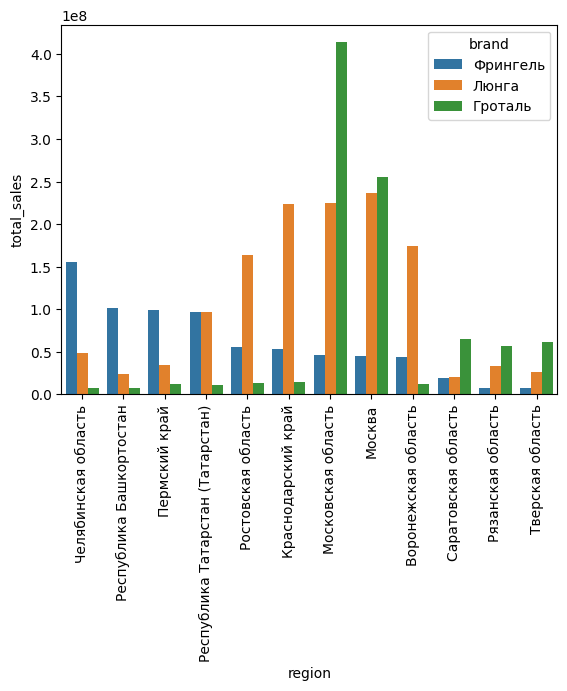

In [ ]:
# Get respective sales for the top regions
fringel = ut.get_top_regions(df_hy, 5, "brand", "region", "total_sales", "Фрингель")
lunga = ut.get_top_regions(df_hy, 5, "brand", "region", "total_sales", "Люнга")

# Get the regions indices
fringel_regions = fringel.index.get_level_values(1)
lunga_regions = lunga.index.get_level_values(1)

# Concatenate all regions
region_indices = pd.concat([grotal, fringel, lunga]).reset_index()["region"]

# Select the data for all the top regions
top_respective_regions = (
    df_hy[
        (df_hy["region"].isin(region_indices))
        & (df_hy["brand"].isin(["Гроталь", "Фрингель", "Люнга"]))
    ]
    .groupby(["region", "brand"])["total_sales"]
    .sum()
    .reset_index()
)

# Sort the values
top_respective_regions = top_respective_regions.sort_values(
    by=["brand", "total_sales"], ascending=[False, False]
)

# Draw a bar chart
top_regions_plot = sns.barplot(
    data=top_respective_regions, x="region", y="total_sales", hue="brand"
)
# Rotate the x-axis labels by 90 degrees
top_regions_plot.set_xticklabels(top_regions_plot.get_xticklabels(), rotation=90)

# Top regions for Grotal in comparison

/var/folders/6s/xfrpp0xd2wlfbjl7gn_y82qw0000gn/T/ipykernel_19115/2111058676.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


[Text(0, 0, 'Московская область'),
 Text(1, 0, 'Москва'),
 Text(2, 0, 'Саратовская область'),
 Text(3, 0, 'Тверская область'),
 Text(4, 0, 'Рязанская область')]

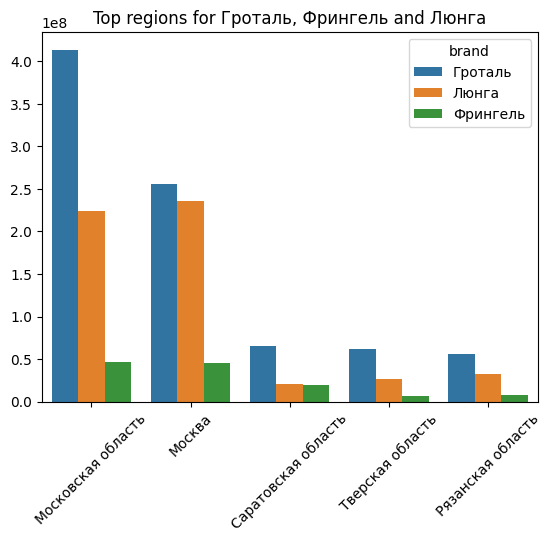

In [ ]:
# Visualize top_regions
plot = sns.barplot(data=top_regions, x="region", y="total_sales", hue="brand")
# Set the title and labels
plot.set(xlabel="", ylabel="", title="Top regions for Гроталь, Фрингель and Люнга")
# Rotate the x-axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

# Region distribution for Grotal

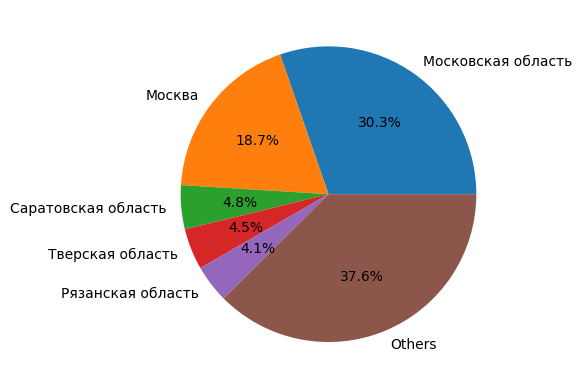

In [ ]:
# Getting top 5 regions for Grotal over the last 6 months

# Calculate the sum of 5 regions with the highest sales
top_5_regions = (
    df_hy[df_hy["brand"] == "Гроталь"]["total_sales"]
    .groupby(df_hy["region"])
    .sum()
    .nlargest(5)
)

# Calculate total sales for Grotal
total_sales_grotal = (
    df_hy[df_hy["brand"] == "Гроталь"]["total_sales"].groupby(df_hy["region"]).sum()
)

# Concatenate the two series into a DataFrame. "Others" is sum of all regions not in the top 5
all_regions = pd.concat(
    [
        top_5_regions,
        pd.Series({"Others": total_sales_grotal.sum() - top_5_regions.sum()}),
    ]
)

# Draw a pie chart
pie_chart = plt.pie(all_regions, labels=all_regions.index, autopct="%1.1f%%")

So, clearly Moscow and MO are leading the way.

# Top gainers and losers + average.

Or, who's growing the most?

In [13]:
# в каких регионах у меня выросли или упали продажи относительно конкурентов?

# Get the last 2 months of data
two_mos = ut.slice_last_mo(df, 2)

# Calculate monthly sales for each of the top brands for each of the 2 last months
monthly_sales = (
    two_mos.groupby(["brand", pd.Grouper(key="date", freq="ME")])["total_sales"]
    .sum()
    .unstack()
)

In [14]:
monthly_sales["change"] = monthly_sales.pct_change(axis=1).iloc[
    :, 1
]  # Copilot suggested to use pct_change and iloc
# Format the numbers as percentages
# monthly_sales['change'] = monthly_sales['change'].map('{:.2%}'.format)
monthly_sales.head()

date,2028-04-30 00:00:00,2028-05-31 00:00:00,change
brand,,,
Брефора,1.208706e+07,1.064583e+07,-0.119237
Бривел,1.763778e+08,1.462637e+08,-0.170737
Венжера,7.366549e+06,5.945125e+06,-0.192957
Вунтель,4.734626e+07,3.734823e+07,-0.211168
Гирба,3.338615e+07,2.747130e+07,-0.177165


/var/folders/6s/xfrpp0xd2wlfbjl7gn_y82qw0000gn/T/ipykernel_19115/772346527.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  change_plot = sns.barplot(x=change_data, y=change_data.index, palette="viridis")


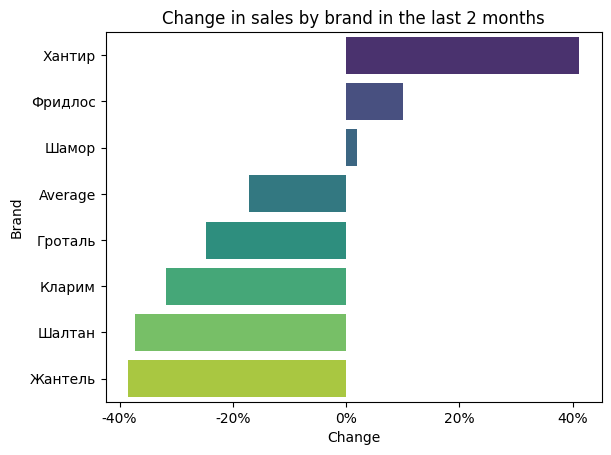

In [475]:
# Plot top 5, average, Гроталь and bottom 5 by change column as a horizontal bar chart
# Calculate the average change
average_change = monthly_sales["change"].mean()
# Add average change to the data
average_change = pd.Series(average_change, index=["Average"])
# Calculate the change for the top 5 brands
top_5 = monthly_sales["change"].nlargest(3).sort_values(ascending=False)
# Calculate the change for the bottom 5 brands
bottom_3 = monthly_sales["change"].nsmallest(3).sort_values(ascending=False)
# Grotal
grotal_change = monthly_sales.loc["Гроталь", "change"]
grotal_change = pd.Series(grotal_change, index=["Гроталь"])
# Concatenate the data
change_data = pd.concat([top_5, average_change, grotal_change, bottom_3])
# Plot the data
change_plot = sns.barplot(x=change_data, y=change_data.index, palette="viridis")
# Format the labels
change_plot.set(
    xlabel="Change",
    ylabel="Brand",
    title="Change in sales by brand in the last 2 months",
)
# Format the numbers as percentages
change_plot.xaxis.set_major_formatter("{:.0%}".format)
# Less ticks
change_plot.xaxis.set_major_locator(plt.MaxNLocator(5))

Looks that Hantir, Fridmos are leading the charge.

# Top/bottom regions for Grotal

/var/folders/6s/xfrpp0xd2wlfbjl7gn_y82qw0000gn/T/ipykernel_19115/1153353895.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  change_plot = sns.barplot(x=change_data, y=change_data.index, palette="viridis").set(


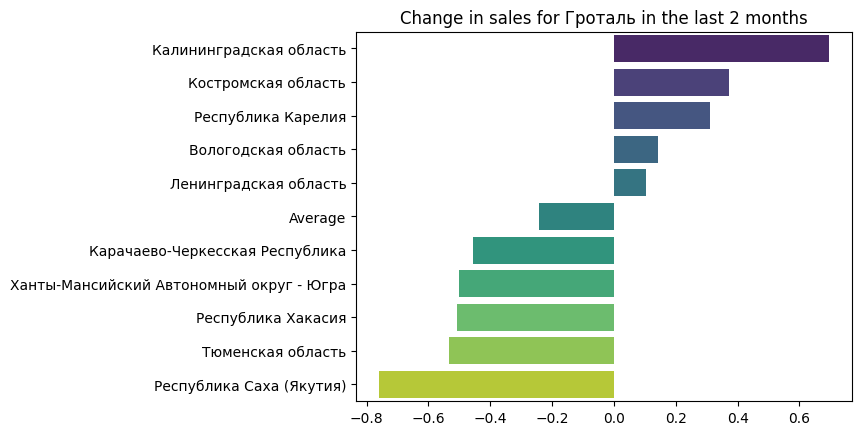

In [ ]:
# Sales change
grotal_monthly_sales = (
    two_mos[two_mos["brand"] == "Гроталь"]
    .groupby(["region", pd.Grouper(key="date", freq="ME")])["total_sales"]
    .sum()
    .unstack()
)
grotal_monthly_sales["change"] = grotal_monthly_sales.pct_change(axis=1).iloc[:, 1]

# Calculate the average change
av = grotal_monthly_sales["change"].mean()
# Top 5 and bottom 5
top_5 = grotal_monthly_sales["change"].nlargest(5).sort_values(ascending=False)
bottom_5 = grotal_monthly_sales["change"].nsmallest(5).sort_values(ascending=False)

# Concatenate the data
change_data = pd.concat([top_5, pd.Series(av, index=["Average"]), bottom_5])

# Plot the data
change_plot = sns.barplot(x=change_data, y=change_data.index, palette="viridis").set(
    xlabel="", ylabel="", title="Change in sales for Гроталь in the last 2 months", 
)


In [49]:
# Why did sales drop in bottom 5 regions? And why did they grow in top 5 regions?

# Top 5 regions for Grotal in the last 6 months
grotal_6m_t5 = df_hy[
    (df_hy["brand"] == "Гроталь") & (df_hy["region"].isin(top_5.index))
]
# Bottom 5 regions for Grotal in the last 6 months
grotal_6m_b5 = df_hy[
    (df_hy["brand"] == "Гроталь") & (df_hy["region"].isin(bottom_5.index))
]


In [115]:
# Group by region and month
grotal_6m_t5_monthly = (
    grotal_6m_t5.groupby(["region", pd.Grouper(key="date", freq="ME")])
    .agg(
        {
            "total_sales": "sum",
            "total_items_count": "sum",
            "total_receipts_count": "sum",
            "total_stores_count": "mean",  # Stores can't be summed, so we take the average
        }
    )
    .reset_index()
)

# Sort by date
grotal_6m_t5_monthly = grotal_6m_t5_monthly.sort_values(["region", "date"])

# Calculate the metrics
grotal_6m_t5_monthly["items_per_receipt"] = (
    grotal_6m_t5_monthly["total_items_count"]
    / grotal_6m_t5_monthly["total_receipts_count"]
)
grotal_6m_t5_monthly["avg_receipt_value"] = (
    grotal_6m_t5_monthly["total_sales"] / grotal_6m_t5_monthly["total_receipts_count"]
)
grotal_6m_t5_monthly["sales_per_store"] = (
    grotal_6m_t5_monthly["total_sales"] / grotal_6m_t5_monthly["total_stores_count"]
)
grotal_6m_t5_monthly["avg_item_price"] = (
    grotal_6m_t5_monthly["total_sales"] / grotal_6m_t5_monthly["total_items_count"]
)

# Do the same for the bottom 5 regions
grotal_6m_b5_monthly = (
    grotal_6m_b5.groupby(["region", pd.Grouper(key="date", freq="ME")])
    .agg(
        {
            "total_sales": "sum",
            "total_items_count": "sum",
            "total_receipts_count": "sum",
            "total_stores_count": "mean",  # Stores can't be summed, so we take the average
        }
    )
    .reset_index()
)

# Sort by date
grotal_6m_b5_monthly = grotal_6m_b5_monthly.sort_values(["region", "date"])

# Calculate the metrics
grotal_6m_b5_monthly["items_per_receipt"] = (
    grotal_6m_b5_monthly["total_items_count"]
    / grotal_6m_b5_monthly["total_receipts_count"]
)
grotal_6m_b5_monthly["avg_receipt_value"] = (
    grotal_6m_b5_monthly["total_sales"] / grotal_6m_b5_monthly["total_receipts_count"]
)
grotal_6m_b5_monthly["sales_per_store"] = (
    grotal_6m_b5_monthly["total_sales"] / grotal_6m_b5_monthly["total_stores_count"]
)
grotal_6m_b5_monthly["avg_item_price"] = (
    grotal_6m_b5_monthly["total_sales"] / grotal_6m_b5_monthly["total_items_count"]
)


In [128]:
# We'll take pct_change of the metrics, as they differ in scale between regions; and we'd like to see relative changes

# Calculate the pct_change
grotal_6m_t5_monthly[
    [
        "pct_items_per_receipt",
        "pct_avg_receipt_value",
        "pct_sales_per_store",
        "pct_avg_item_price",
    ]
] = grotal_6m_t5_monthly.groupby("region")[
    [
        "pct_items_per_receipt",
        "pct_avg_receipt_value",
        "pct_sales_per_store",
        "pct_avg_item_price",
    ]
].pct_change()


# Set first datapoints for pct_ columns to 1, as they are NaN
grotal_6m_t5_monthly.loc[
    grotal_6m_t5_monthly.groupby("region").head(1).index,
    [
        "pct_items_per_receipt",
        "pct_avg_receipt_value",
        "pct_sales_per_store",
        "pct_avg_item_price",
    ],
] = 1

# Calculate pct_ columns as cumulative sum, starting from 1
grotal_6m_t5_monthly[
    [
        "pct_items_per_receipt",
        "pct_avg_receipt_value",
        "pct_sales_per_store",
        "pct_avg_item_price",
    ]
] = grotal_6m_t5_monthly.groupby("region")[
    [
        "pct_items_per_receipt",
        "pct_avg_receipt_value",
        "pct_sales_per_store",
        "pct_avg_item_price",
    ]
].cumsum()

# Do the same for the bottom 5 regions
grotal_6m_b5_monthly[
    [
        "pct_items_per_receipt",
        "pct_avg_receipt_value",
        "pct_sales_per_store",
        "pct_avg_item_price",
    ]
] = grotal_6m_b5_monthly.groupby("region")[
    [
        "pct_items_per_receipt",
        "pct_avg_receipt_value",
        "pct_sales_per_store",
        "pct_avg_item_price",
    ]
].pct_change()

# Set first datapoints for pct_ columns to 1, as they are NaN
grotal_6m_b5_monthly.loc[
    grotal_6m_b5_monthly.groupby("region").head(1).index,
    [
        "pct_items_per_receipt",
        "pct_avg_receipt_value",
        "pct_sales_per_store",
        "pct_avg_item_price",
    ],
] = 1

# Calculate pct_ columns as cumulative sum, starting from 1
grotal_6m_b5_monthly[
    [
        "pct_items_per_receipt",
        "pct_avg_receipt_value",
        "pct_sales_per_store",
        "pct_avg_item_price",
    ]
] = grotal_6m_b5_monthly.groupby("region")[
    [
        "pct_items_per_receipt",
        "pct_avg_receipt_value",
        "pct_sales_per_store",
        "pct_avg_item_price",
    ]
].cumsum()

In [130]:
grotal_6m_t5_monthly

,region,date,total_sales,total_items_count,total_receipts_count,total_stores_count,items_per_receipt,avg_receipt_value,sales_per_store,avg_item_price,pct_items_per_receipt,pct_avg_receipt_value,pct_sales_per_store,pct_avg_item_price
0,Вологодская область,2027-12-31,1623172.90,14341,12085,133.500000,1.186678,134.313024,12158.598502,113.184081,1.000000,1.000000,1.000000,1.000000
1,Вологодская область,2028-01-31,986345.48,8135,7165,128.000000,1.135380,137.661616,7705.824062,121.247140,0.956772,1.024931,0.633776,1.071238
2,Вологодская область,2028-02-29,972609.74,8878,7804,128.000000,1.137622,124.629644,7598.513594,109.552798,0.958929,0.934814,0.599106,0.987190
3,Вологодская область,2028-03-31,847392.76,7356,6458,105.500000,1.139052,131.215974,8032.158863,115.197493,0.960297,0.995731,0.749596,1.041060
4,Вологодская область,2028-04-30,535676.28,4234,3697,70.200000,1.145253,144.894855,7630.716239,126.517780,0.966203,1.102907,0.644700,1.133655
5,Вологодская область,2028-05-31,612705.43,4600,4019,68.250000,1.144563,152.452210,8977.368938,133.196833,0.965557,1.146696,1.091483,1.175205
6,Калининградская область,2028-03-31,7900.68,67,58,5.666667,1.155172,136.218621,1394.237647,117.920597,1.000000,1.000000,1.000000,1.000000
7,Калининградская область,2028-04-30,116675.07,810,712,21.000000,1.137640,163.869480,5555.955714,144.043296,0.984823,1.202989,3.984942,1.221528
8,Калининградская область,2028-05-31,197973.18,1279,1117,31.250000,1.145031,177.236509,6335.141760,154.787475,0.991522,1.259354,3.993773,1.271517
9,Костромская область,2027-12-31,257160.05,1901,1600,23.750000,1.188125,160.725031,10827.791579,135.276197,1.000000,1.000000,1.000000,1.000000


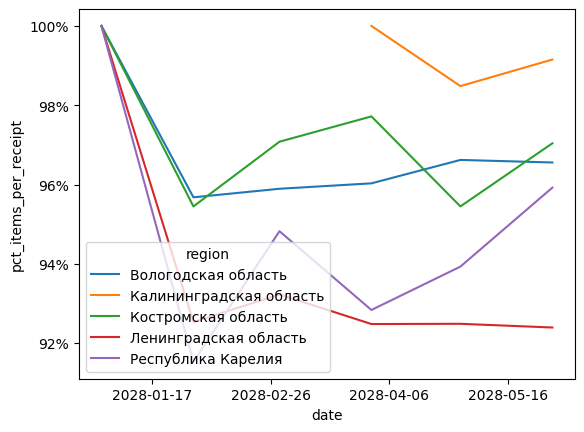

In [129]:
# Plot the pct_change for pct_items_per_receipt
plot = sns.lineplot(
    data=grotal_6m_t5_monthly, x="date", y="pct_items_per_receipt", hue="region"
)
# Less ticks
plot.xaxis.set_major_locator(plt.MaxNLocator(5))
plot.yaxis.set_major_formatter("{:.0%}".format)

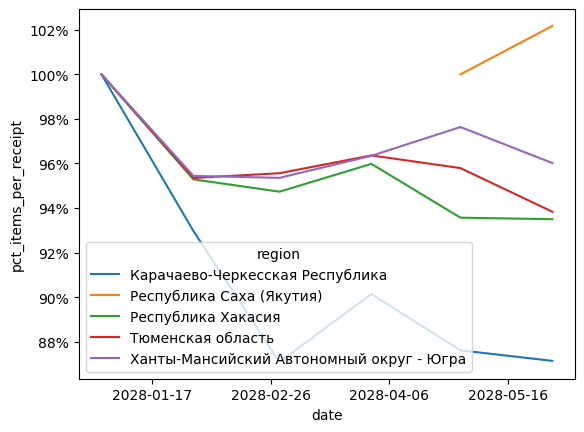

In [131]:
# Do the same for the bottom 5 regions
plot = sns.lineplot(
    data=grotal_6m_b5_monthly, x="date", y="pct_items_per_receipt", hue="region"
)
# Less ticks
plot.xaxis.set_major_locator(plt.MaxNLocator(5))
plot.yaxis.set_major_formatter("{:.0%}".format)


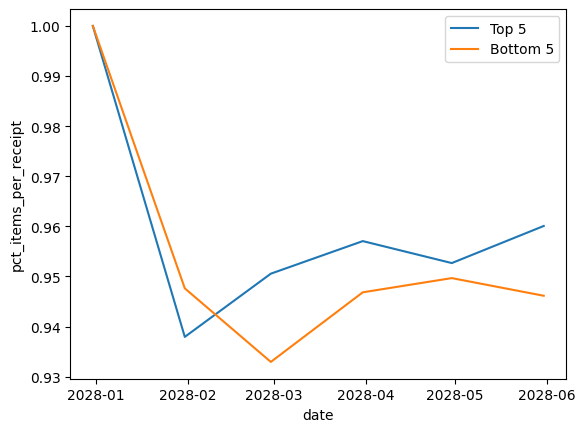

In [125]:
# Plot mean pct_items_per_receipt for top 5 and bottom 5 regions
plot = sns.lineplot(
    data=grotal_6m_t5_monthly.groupby("date")["pct_items_per_receipt"].mean(),
    label="Top 5",
)
plot = sns.lineplot(
    data=grotal_6m_b5_monthly.groupby("date")["pct_items_per_receipt"].mean(),
    label="Bottom 5",
)


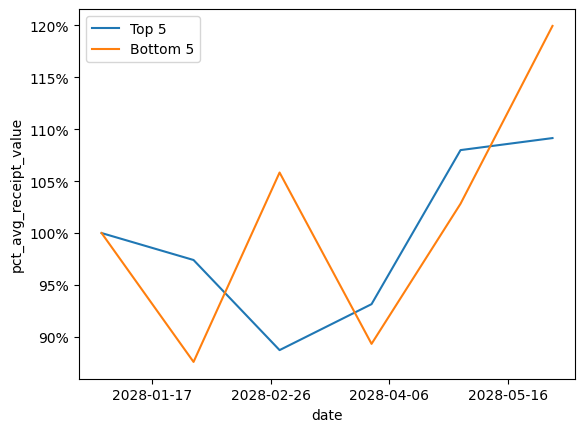

In [136]:
# Now let's plot pct_avg_receipt_value
plot = sns.lineplot(
    data=grotal_6m_t5_monthly.groupby("date")["pct_avg_receipt_value"].mean(),
    label="Top 5",
)
plot = sns.lineplot(
    data=grotal_6m_b5_monthly.groupby("date")["pct_avg_receipt_value"].mean(),
    label="Bottom 5",
)
plot.xaxis.set_major_locator(plt.MaxNLocator(5))
plot.yaxis.set_major_formatter("{:.0%}".format)

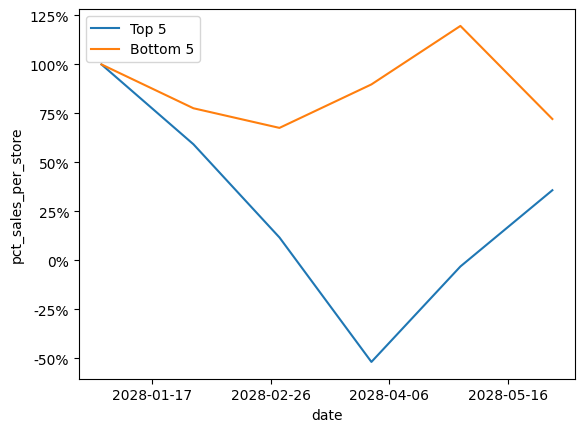

In [137]:
# Next metric, sales per store
plot = sns.lineplot(
    data=grotal_6m_t5_monthly.groupby("date")["pct_sales_per_store"].mean(),
    label="Top 5",
)
plot = sns.lineplot(
    data=grotal_6m_b5_monthly.groupby("date")["pct_sales_per_store"].mean(),
    label="Bottom 5",
)
plot.xaxis.set_major_locator(plt.MaxNLocator(5))
plot.yaxis.set_major_formatter("{:.0%}".format)


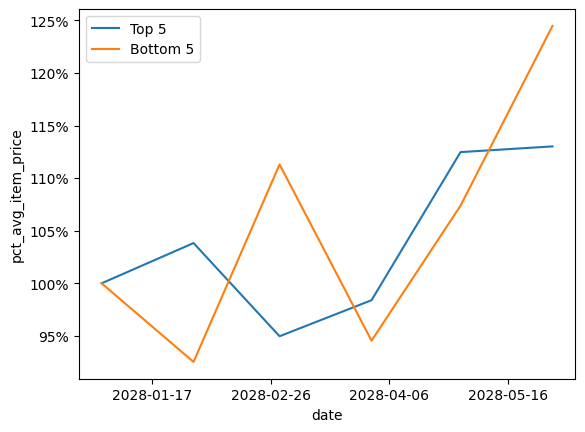

In [138]:
# And the last metric, avg_item_price
plot = sns.lineplot(
    data=grotal_6m_t5_monthly.groupby("date")["pct_avg_item_price"].mean(),
    label="Top 5",
)
plot = sns.lineplot(
    data=grotal_6m_b5_monthly.groupby("date")["pct_avg_item_price"].mean(),
    label="Bottom 5",
)
plot.xaxis.set_major_locator(plt.MaxNLocator(5))
plot.yaxis.set_major_formatter("{:.0%}".format)


# How do metrics differ over time?

Between top and bottom 5 regions for Grotal:

Text(0.5, 0.98, 'Metrics (blue - top 5 regions, red - bottom 5 regions)')

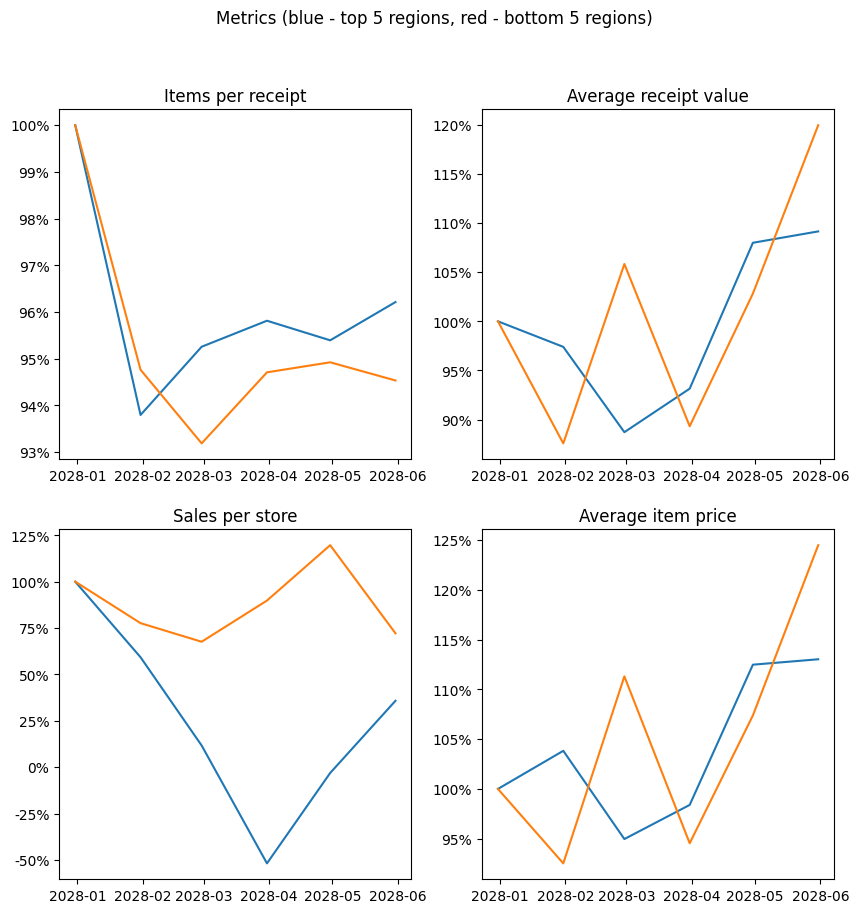

In [188]:
# Plot all four metrics in a pairplot
plot, axes = plt.subplots(2, 2, figsize=(10, 10))
# Set green color for top 5 and red for bottom 5

sns.lineplot(
    data=grotal_6m_t5_monthly.groupby("date")["pct_items_per_receipt"].mean(),
    ax=axes[0, 0],
)
sns.lineplot(
    data=grotal_6m_b5_monthly.groupby("date")["pct_items_per_receipt"].mean(),
    ax=axes[0, 0],
)

sns.lineplot(
    data=grotal_6m_t5_monthly.groupby("date")["pct_avg_receipt_value"].mean(),
    ax=axes[0, 1],
)
sns.lineplot(
    data=grotal_6m_b5_monthly.groupby("date")["pct_avg_receipt_value"].mean(),
    ax=axes[0, 1],
)

sns.lineplot(
    data=grotal_6m_t5_monthly.groupby("date")["pct_sales_per_store"].mean(),
    ax=axes[1, 0],
)
sns.lineplot(
    data=grotal_6m_b5_monthly.groupby("date")["pct_sales_per_store"].mean(),
    ax=axes[1, 0],
)

sns.lineplot(
    data=grotal_6m_t5_monthly.groupby("date")["pct_avg_item_price"].mean(),
    ax=axes[1, 1],
)
sns.lineplot(
    data=grotal_6m_b5_monthly.groupby("date")["pct_avg_item_price"].mean(),
    ax=axes[1, 1],
)

# Chart titles
plot.axes[0].set_title("Items per receipt")
plot.axes[1].set_title("Average receipt value")
plot.axes[2].set_title("Sales per store")
plot.axes[3].set_title("Average item price")

# Set % formatter
for ax in plot.axes:
    ax.yaxis.set_major_formatter("{:.0%}".format)

# Remove axis labels
for ax in plot.axes:
    ax.set_xlabel("")
    ax.set_ylabel("")

# Set title for the whole plot
plot.suptitle("Metrics (blue - top 5 regions, red - bottom 5 regions)")

It turns out the only metric differing (a LOT) is sales per store. This could be related to:
- less stores
- less sales overall
- more sales for the competitors (due to prices/more stores/more sales per store)

Let's definitely research the competitors in the regions our sales tanked, as they may hold the key.
So we'll plot:
- competitors' avg. prices in these regions
- their stores and sales per store

# Competitor research

Let's find brands whose sales have grown in the last 6 months in the regions where Grotal's sales have dropped.

In [213]:
reg_grotal_comp = grotal_6m_b5_monthly["region"].unique()

monthly_hy = ut.slice_last_mo(df, 6).groupby(["region", "brand", pd.Grouper(key="date", freq="ME")]).agg(
        {
            "total_sales": "sum",
            "total_items_count": "sum",
            "total_receipts_count": "sum",
            "total_stores_count": "mean",  # Stores can't be summed, so we take the average
            "items_per_receipt": "mean",
            "avg_receipt_value": "mean",
            "sales_per_store": "mean",
            "avg_item_price": "mean",
        }
    )

In [368]:
# Let's find brands whose sales have grown in the last 6 months in the regions where Grotal's sales have dropped
grotal_comp_pct_sales = monthly_hy.loc[reg_grotal_comp, "total_sales"].unstack().pct_change(axis=1)

# Set NA to 1
grotal_comp_pct_sales = grotal_comp_pct_sales.fillna(0)

# # Calculate cumulative sum of pct_change
grotal_comp_pct_sales = grotal_comp_pct_sales.cumsum(axis=1).iloc[:, -1]

/var/folders/6s/xfrpp0xd2wlfbjl7gn_y82qw0000gn/T/ipykernel_19115/4055113941.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  grotal_comp_pct_sales = monthly_hy.loc[reg_grotal_comp, "total_sales"].unstack().pct_change(axis=1)


In [443]:
br_grotal_comp = grotal_comp_pct_sales.groupby("region").nlargest(3)

# For each region, get data for brands that are in the top 3 for that specific region
grotal_comp = pd.DataFrame()

for region in reg_grotal_comp:
    # Get top 3 brands for this region
    region_top_3 = br_grotal_comp.loc[region].index.get_level_values(1)
    print(f'Region: {region}, top 3 brands: {region_top_3}')
    
    # Get data for these brands in this region
    region_data = df_hy[
        (df_hy["region"] == region) &
        (df_hy["brand"].isin(region_top_3))
    ]
    
    # Append to the final dataframe
    grotal_comp = pd.concat([grotal_comp, region_data])

Region: Карачаево-Черкесская Республика, top 3 brands: Index(['Зефора', 'Фрингель', 'Корманис'], dtype='object', name='brand')
Region: Республика Саха (Якутия), top 3 brands: Index(['Корманис', 'Каморн', 'Бривел'], dtype='object', name='brand')
Region: Республика Хакасия, top 3 brands: Index(['Люнга', 'Прандир', 'Зефора'], dtype='object', name='brand')
Region: Тюменская область, top 3 brands: Index(['Корманис', 'Зефора', 'Люнга'], dtype='object', name='brand')
Region: Ханты-Мансийский Автономный округ - Югра, top 3 brands: Index(['Зефора', 'Хмедон', 'Люнга'], dtype='object', name='brand')


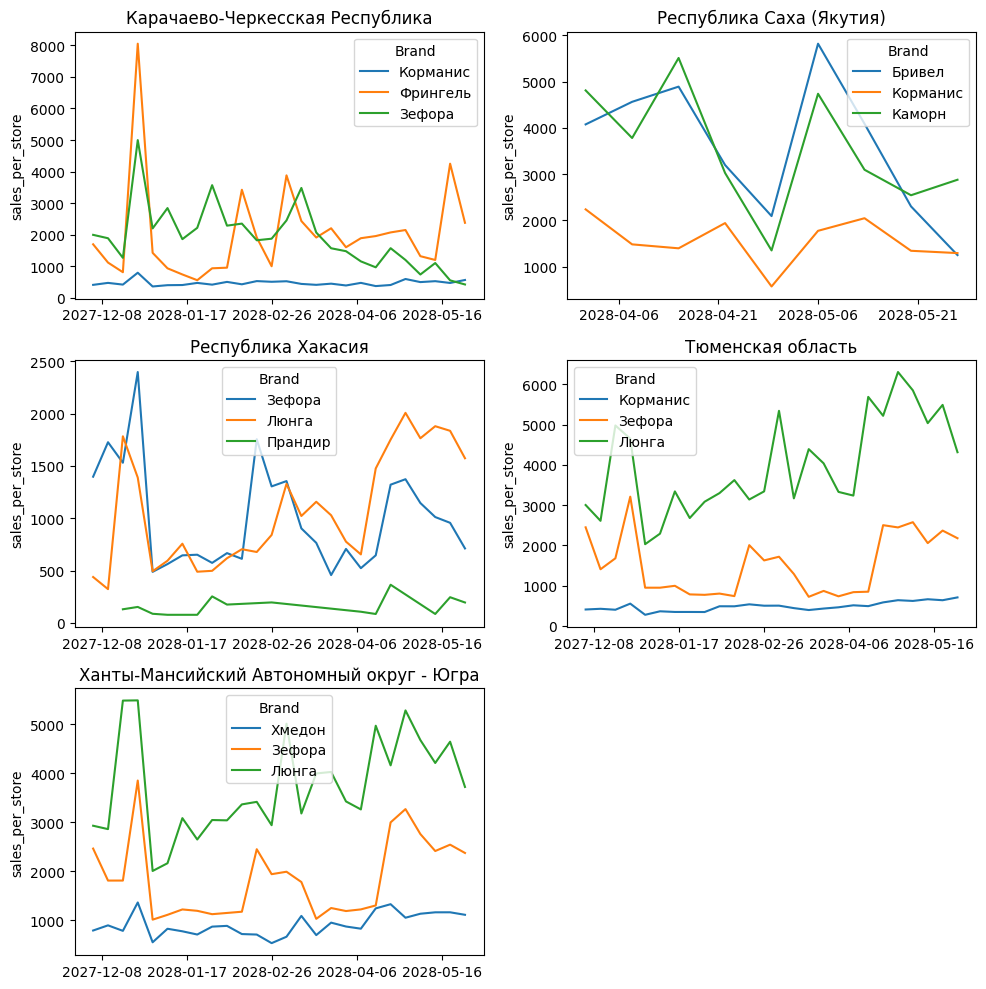

In [471]:
# How much did these brands sell per store?
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.ravel()

for i, region in enumerate(reg_grotal_comp):
    region_top_3 = br_grotal_comp.loc[region].index.get_level_values(1)
    region_data = grotal_comp[(grotal_comp["region"] == region) & (grotal_comp["brand"].isin(region_top_3))]
    
    sns.lineplot(data=region_data, x="date", y="sales_per_store", hue="brand", ax=axes[i])
    axes[i].set_title(f"{region}")
    # axes[i].set_ylabel("Total Sales")
    axes[i].set_xlabel("")
    # Less ticks
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(5))
    # axes[i].yaxis.set_major_formatter("₽ {x:,.0f}")
    axes[i].legend(title="Brand")
    
# Remove the last subplot if not needed
if len(reg_grotal_comp) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()

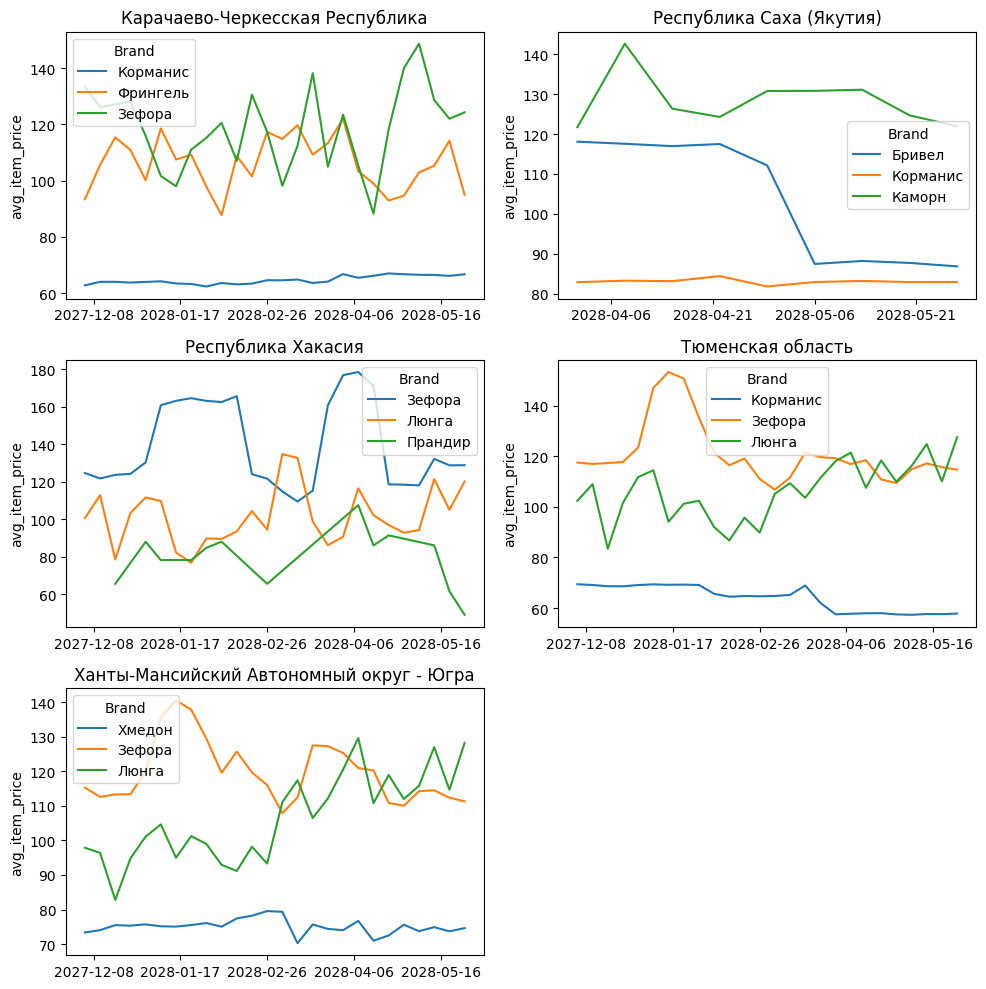

In [472]:
# Perhaps the sales per store are growing because the average item price is growing?

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.ravel()

for i, region in enumerate(reg_grotal_comp):
    region_top_3 = br_grotal_comp.loc[region].index.get_level_values(1)
    region_data = grotal_comp[(grotal_comp["region"] == region) & (grotal_comp["brand"].isin(region_top_3))]
    
    sns.lineplot(data=region_data, x="date", y="avg_item_price", hue="brand", ax=axes[i])
    axes[i].set_title(f"{region}")
    # axes[i].set_ylabel("Total Sales")
    axes[i].set_xlabel("")
    # Less ticks
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(5))
    # axes[i].yaxis.set_major_formatter("₽ {x:,.0f}")
    axes[i].legend(title="Brand")
    
# Remove the last subplot if not needed
if len(reg_grotal_comp) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()

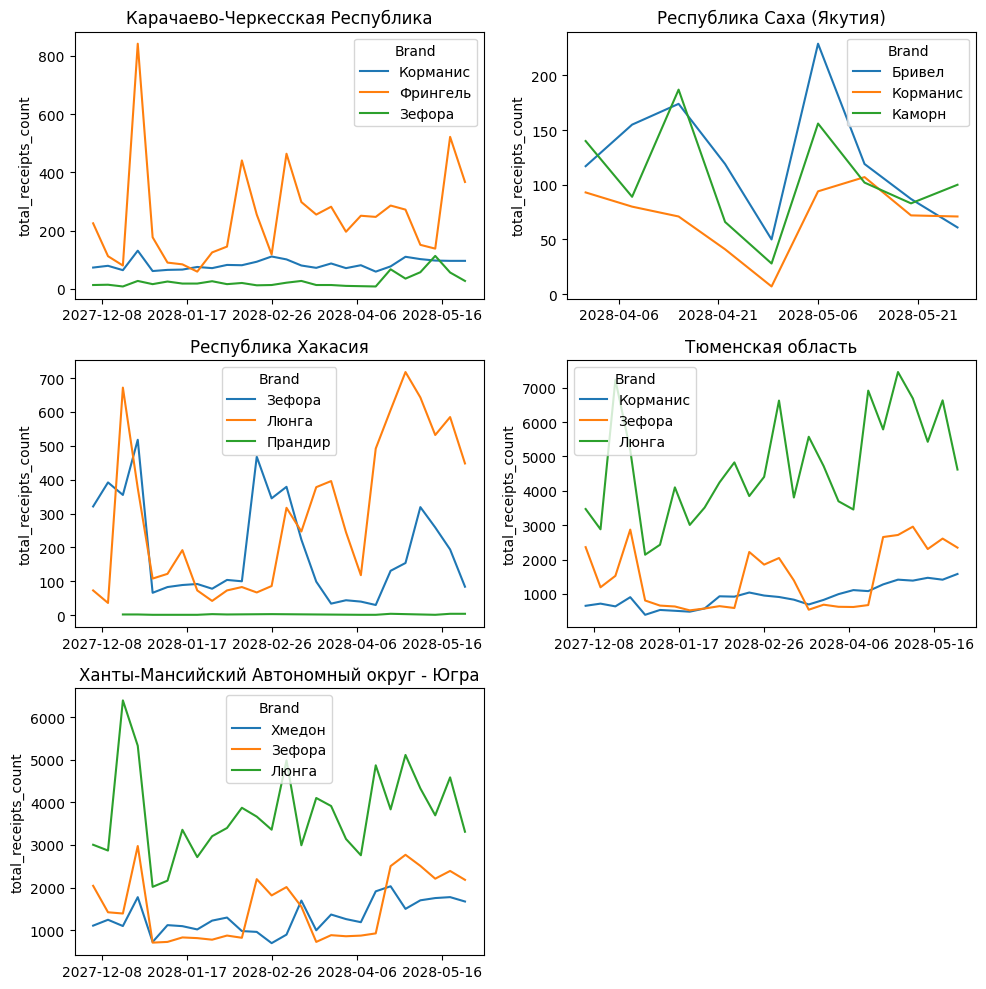

In [474]:
# Perhaps the sales per store are growing because the average receipt value is growing?

fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.ravel()

for i, region in enumerate(reg_grotal_comp):
    region_top_3 = br_grotal_comp.loc[region].index.get_level_values(1)
    region_data = grotal_comp[(grotal_comp["region"] == region) & (grotal_comp["brand"].isin(region_top_3))]
    
    sns.lineplot(data=region_data, x="date", y="total_receipts_count", hue="brand", ax=axes[i])
    axes[i].set_title(f"{region}")
    axes[i].set_xlabel("")
    # Less ticks
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(5))
    # axes[i].yaxis.set_major_formatter("₽ {x:,.0f}")
    axes[i].legend(title="Brand")
    
# Remove the last subplot if not needed
if len(reg_grotal_comp) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()

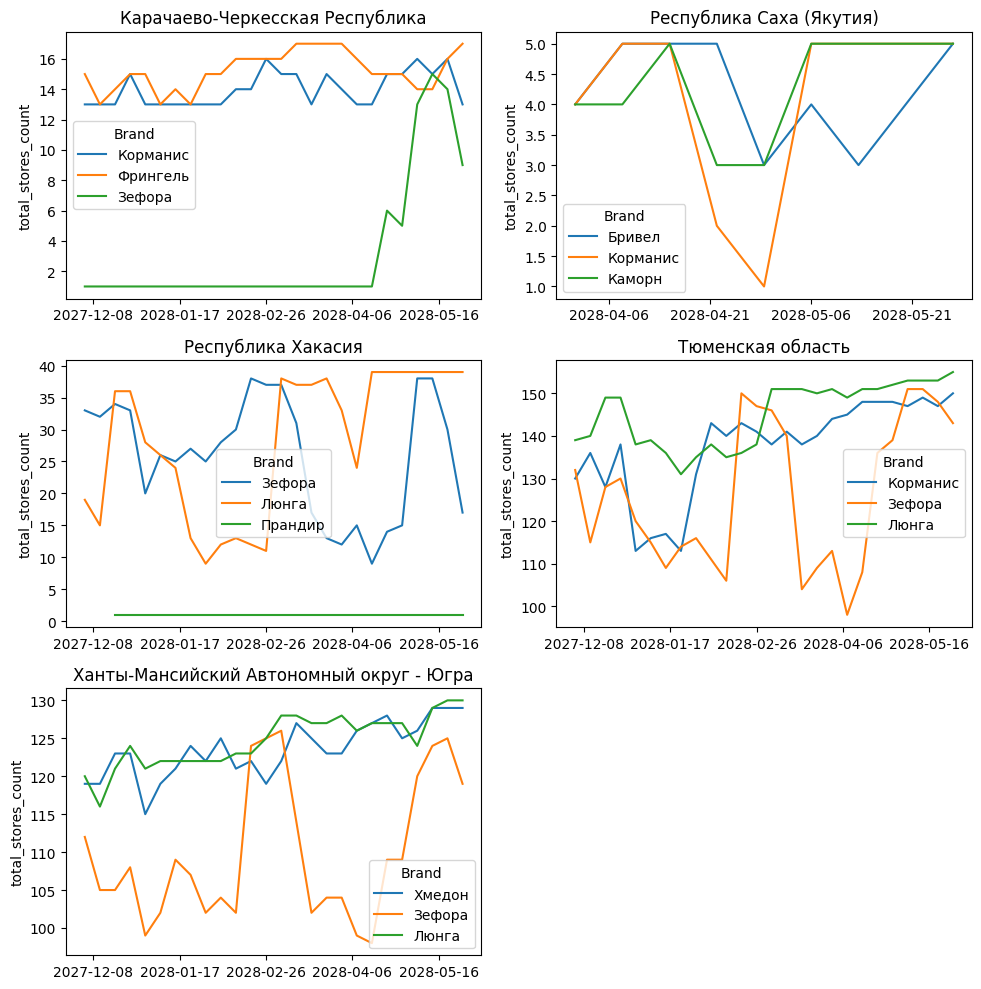

In [473]:
# Plot total stores for the top 3 brands in the top 5 regions
# For each region, plot the sales of the top 3 brands on a separate line chart
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.ravel()

for i, region in enumerate(reg_grotal_comp):
    region_top_3 = br_grotal_comp.loc[region].index.get_level_values(1)
    region_data = grotal_comp[(grotal_comp["region"] == region) & (grotal_comp["brand"].isin(region_top_3))]
    
    sns.lineplot(data=region_data, x="date", y="total_stores_count", hue="brand", ax=axes[i])
    axes[i].set_title(f"{region}")
    # axes[i].set_ylabel("Total Sales")
    axes[i].set_xlabel("")
    # Less ticks
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(5))
    # axes[i].yaxis.set_major_formatter("₽ {x:,.0f}")
    axes[i].legend(title="Brand")
    
# Remove the last subplot if not needed
if len(reg_grotal_comp) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()

# Competitor insights

1. Competitors have definitely been **opening new stores**
2. Item **prices had dropped** in some, hinting an ad campaign? Perhaps 'vampire attacks' to **retarget competitor clients to their new stores**?

## Possible strategies?

- Loyalty program
- Unique ad campaigns, e.g. 'each n-th receipt is on us'; not changing the general pricing strategy
- Opening new stores in top people traffic areas. Our revenue from top regions will allow that

<Axes: >

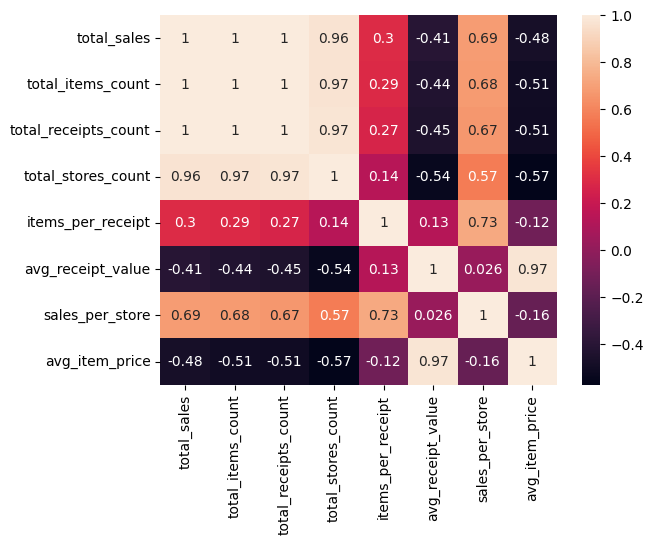

In [203]:
# Let's plot the correlation between the metrics
# Calculate the correlation matrix
cols = [
    col
    for col in grotal_6m_t5_monthly.columns
    if (col not in ["region", "date"]) and ("pct_" not in col)
]

# Show the heatmap
sns.heatmap(grotal_6m_t5_monthly[cols].corr(), annot=True)

# Correlation thoughts

- It's weird that total_ columns are ideally correlated. IMO that's related to synthetic data generation
- 

# Preliminary insights

So, now we know:

- top brands by sales
- top regions for our and rivaling brands
- top gainers/losers among brands AND top gainers/losers among our regions (need to deduce why + *add top sales' regions*)

# Additional

In [17]:
# Let's define some other metrics

# Items per receipt
df["items_per_receipt"] = df["total_items_count"] / df["total_receipts_count"]
# Avg receipt value
df["avg_receipt_value"] = df["total_sales"] / df["total_receipts_count"]
# Avg sales per store
df["sales_per_store"] = df["total_sales"] / df["total_stores_count"]
# Average item price
df["avg_item_price"] = df["total_sales"] / df["total_items_count"]

# Top regions and top brands

<Axes: xlabel='region', ylabel='brand'>

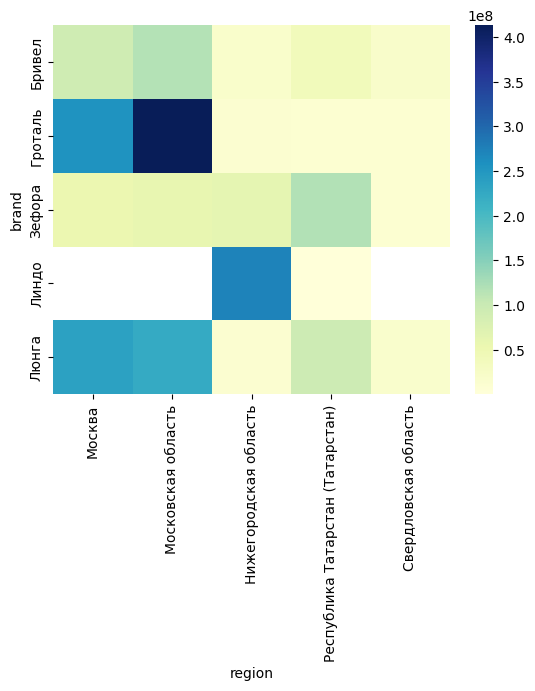

In [ ]:
# get top 5 regions
regs = df_hy.groupby("region")["total_sales"].sum().nlargest(5)
reg_indices = regs.index
# get top 5 brands
brs_ind = (
    df_hy[df_hy["region"].isin(reg_indices)]
    .groupby("brand")["total_sales"]
    .sum()
    .nlargest(5)
)
brss = brs_ind.index

brs = df_hy[df_hy["region"].isin(reg_indices) & df_hy["brand"].isin(brss)]

# Make a dataframe with brands as x, regions as y and total sales as values
heatmap_data = brs.pivot_table(
    index="brand", columns="region", values="total_sales", aggfunc="sum"
)
sns.heatmap(heatmap_data, fmt=".1f", cmap="YlGnBu")

# Now let's make a heatmap for Гроталь over time

([<matplotlib.axis.XTick at 0x11e959550>,
 [Text(0, 0, '2027-12'),
  Text(6, 0, '2028-01'),
  Text(12, 0, '2028-02'),
  Text(18, 0, '2028-04'),
  Text(24, 0, '2028-05')])

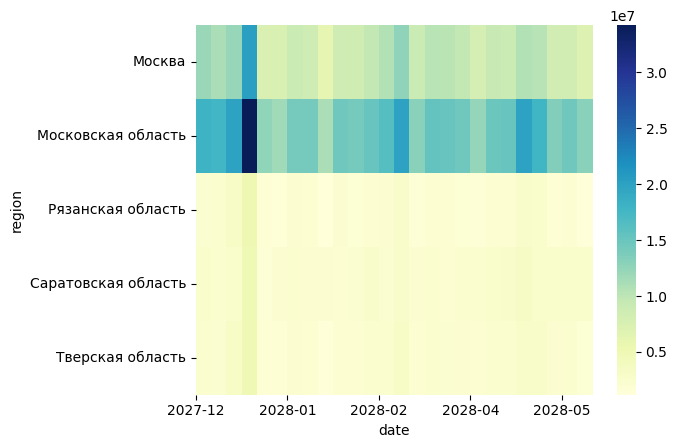

In [ ]:
df_grotal = df_hy[df_hy["brand"] == "Гроталь"]

# slice to top 5 regions from top_5_regions
df_grotal = df_grotal[df_grotal["region"].isin(top_5_regions.index)]

htmp_data = df_grotal.pivot_table(
    index="region", columns="date", values="total_sales", aggfunc="sum"
)

# format columns to YYYY-MM, they are datetime objects
htmp_data.columns = htmp_data.columns.strftime("%Y-%m")

sns.heatmap(htmp_data, fmt=".1f", cmap="YlGnBu")
# x-ticks are once half a year
plt.xticks(range(0, len(htmp_data.columns), 6), htmp_data.columns[::6], rotation=0)